In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from unc_tools import UncRegression, FunctionBase1D
import numpy as np
import uncertainties as unc

Total time: 1.321994924545288 min
Total time: 4.765963192780813 min
Total time: 26.092924284934995 min


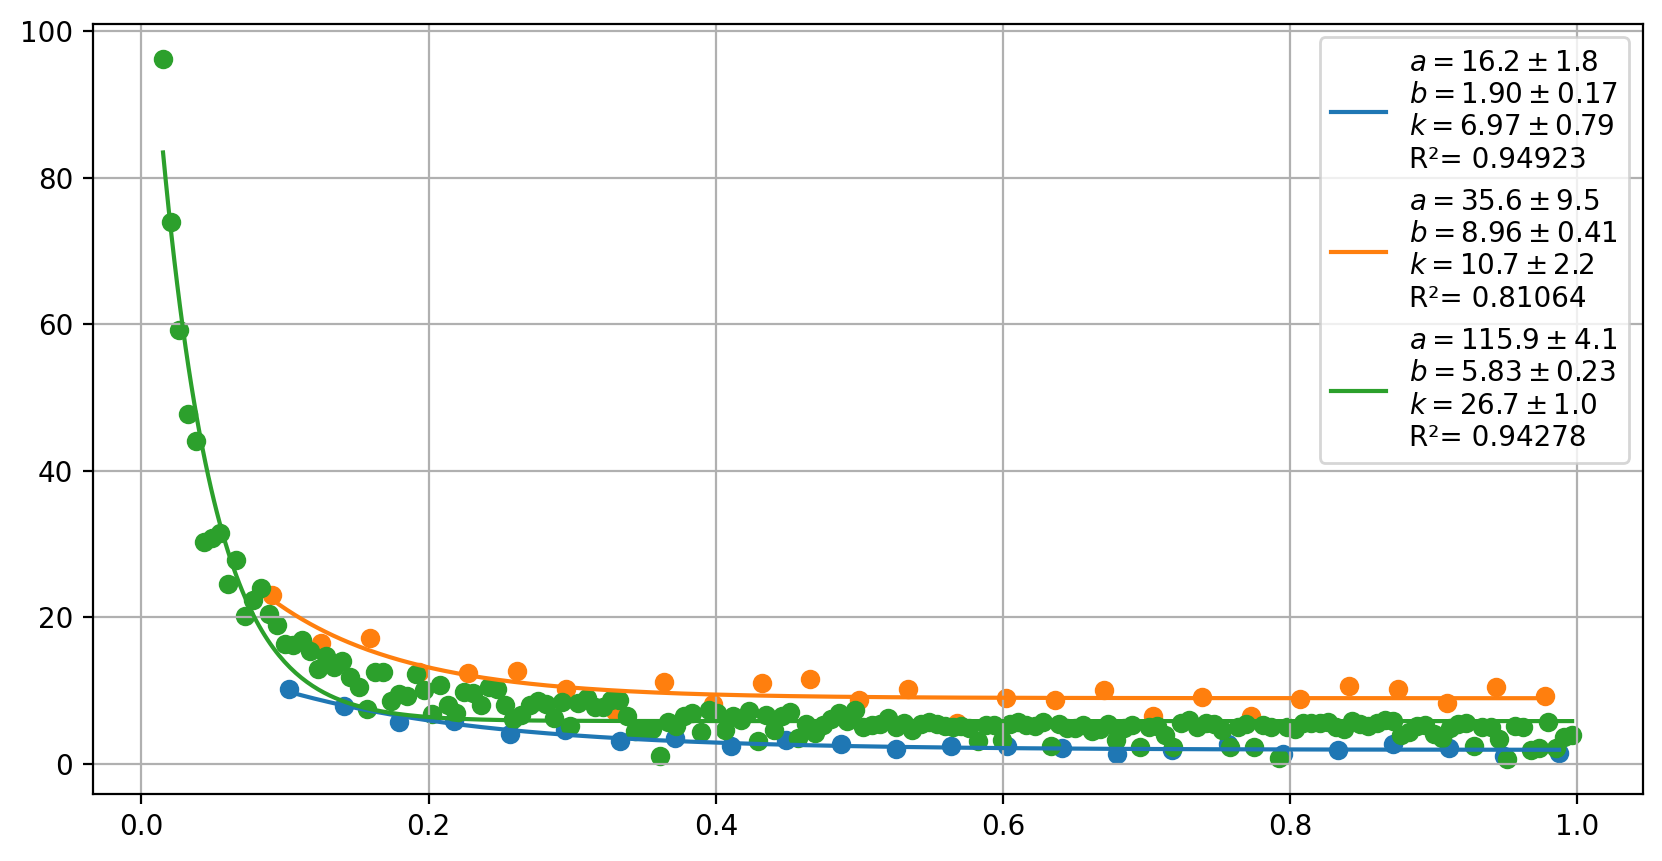

In [59]:
fig, axes = plt.subplots(dpi = 200, figsize = (10,5))

a, k, b = [], [], []

for i in range(1,4):
    df = pd.read_csv(f"{i}.csv")

    print(f"Total time: {np.sum(df.time/60)} min")
    
    reg = UncRegression(df.n,df.time, FunctionBase1D("a*exp(-k*x) + b"))
    a.append(reg.coefs[0])
    b.append(reg.coefs[1])
    k.append(reg.coefs[2])
    reg.plot(ax = axes, show_coefficients=True, show_expr=False)

a, b, k = np.mean(a), np.mean(b), np.mean(k)



(0.24758933338610628+/-0.016895424092137547, 7)

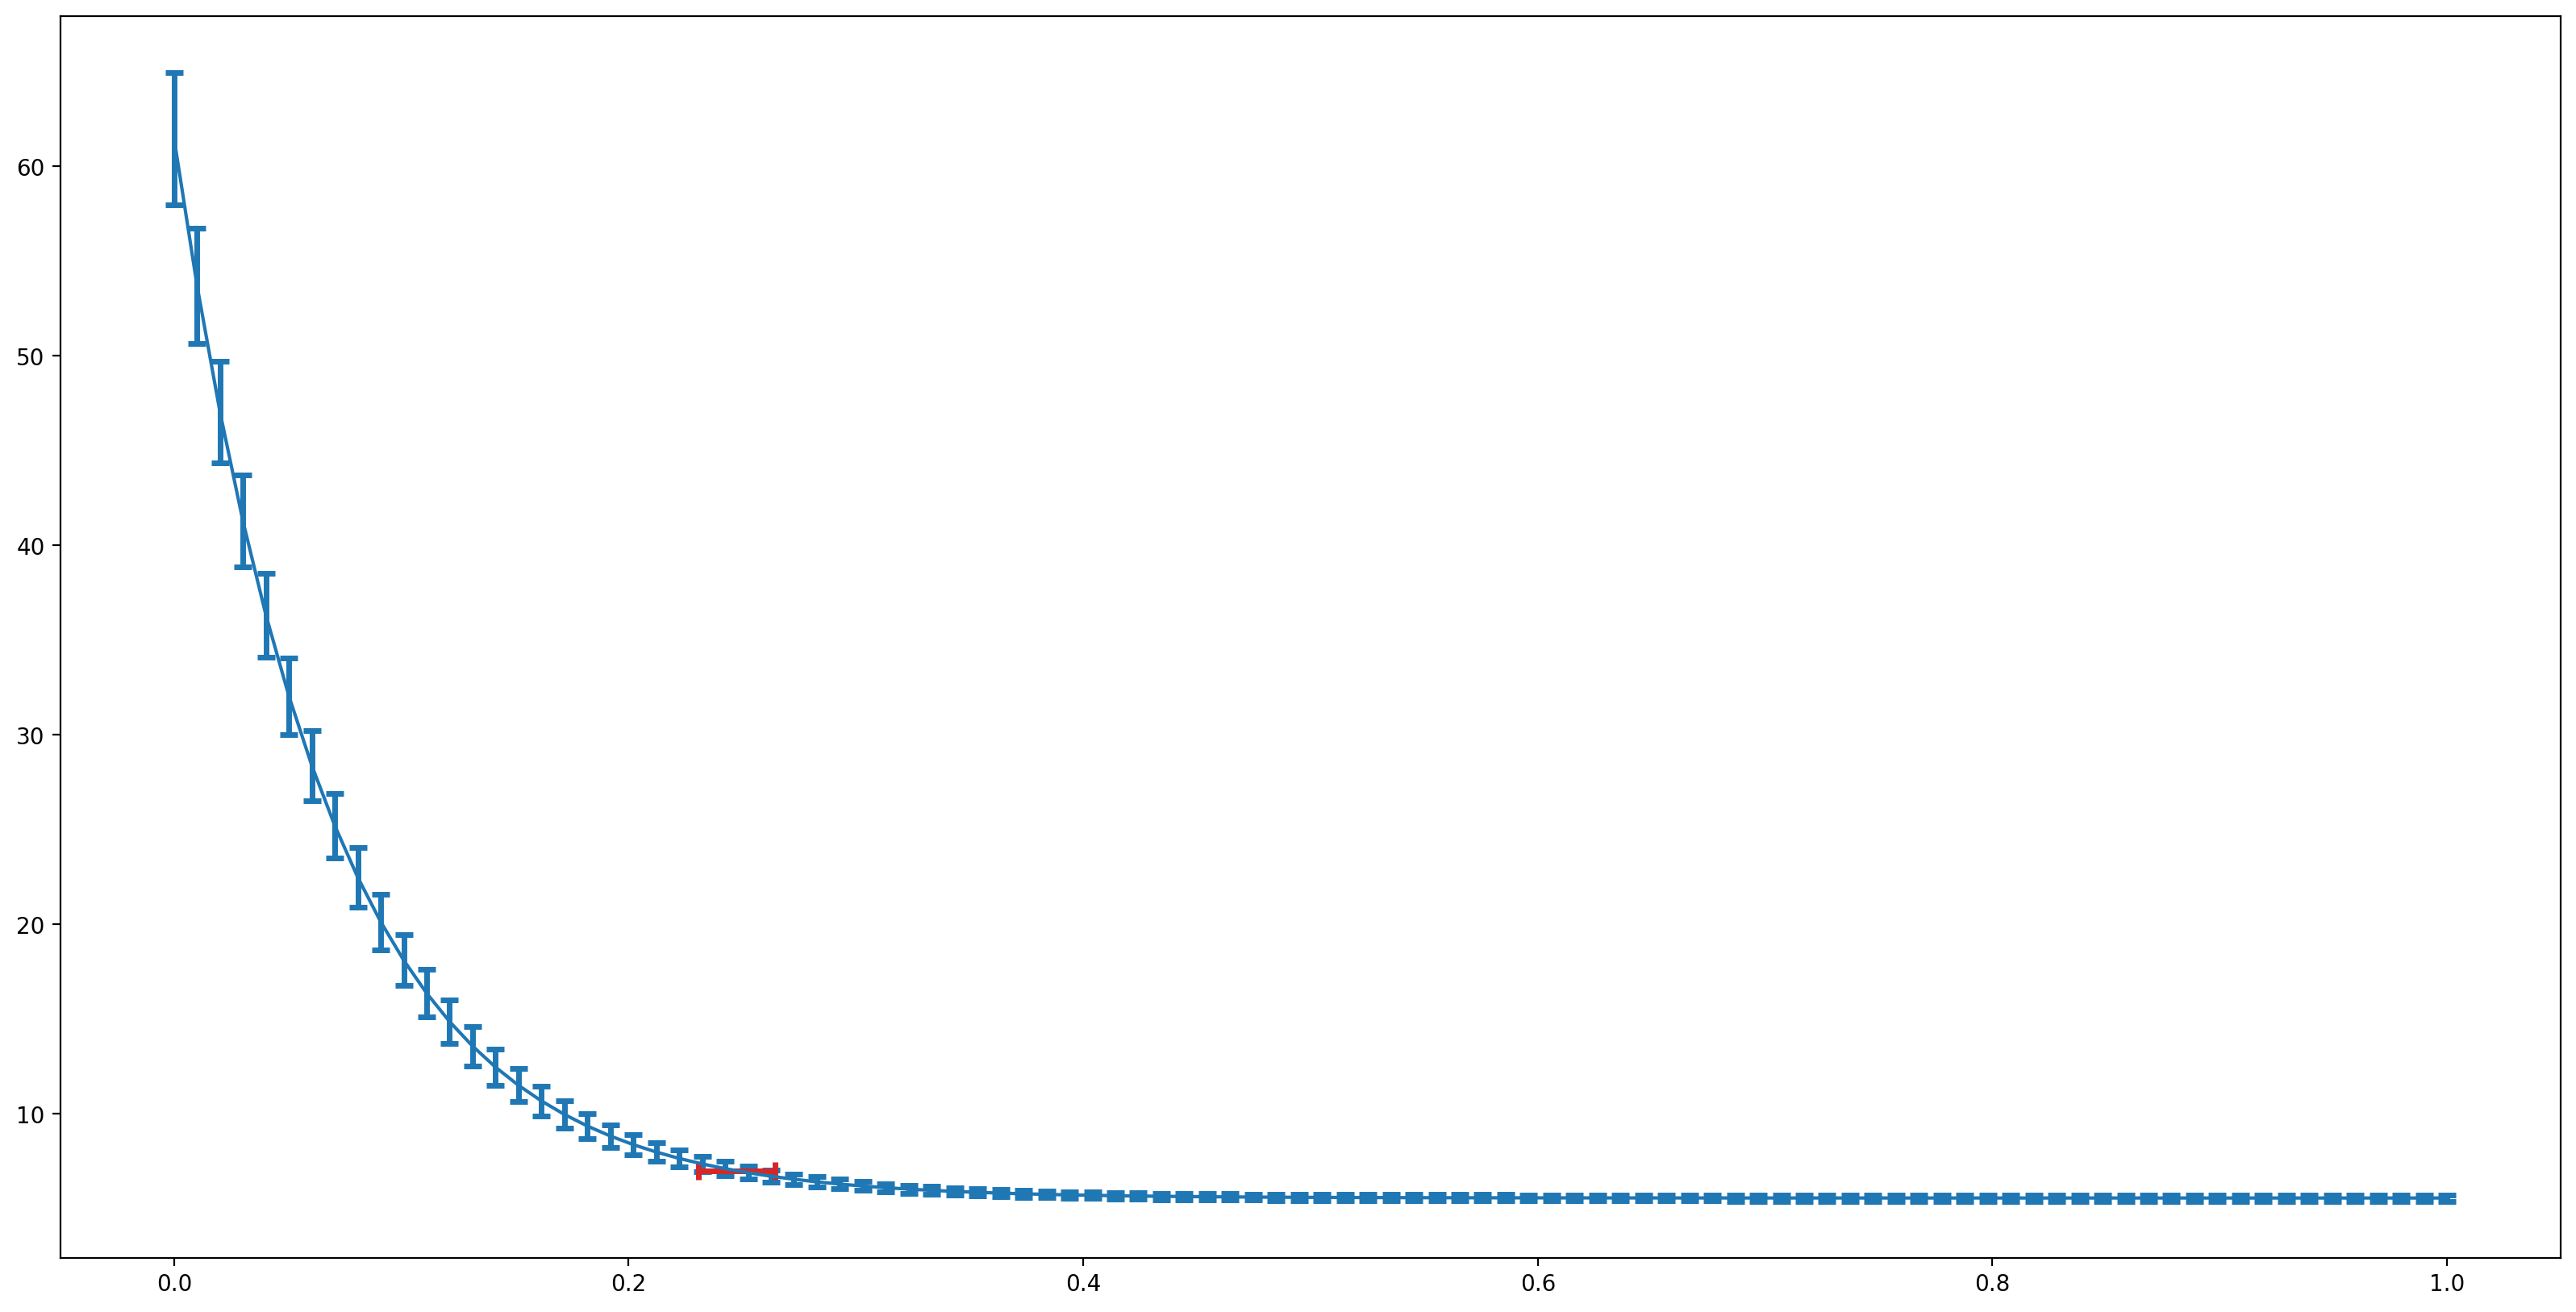

In [62]:
from unc_tools.patches import *

fig, axes = plt.subplots(dpi = 200, figsize = (20,10))

x = np.linspace(0,1,100)

y = a*unc.unumpy.exp(-k*x) + b



axes.plot(x,y)

y1 = a*unc.unumpy.exp(-k) + b
y1 = 7
x1 = unc.unumpy.log((y1-b)/a) / (-k)

axes.plot(x1,y1)

x1, y1

[0.20270193 0.33969639 0.38981536 0.66572794 0.73763716 0.88342931
 0.99433774 1.11896405 1.15214998 1.16279175 1.36315874 1.40998468
 1.45704031 1.58025552 1.67646261 1.68584571 1.75132264 1.8217696
 1.97269015 2.10716356 2.1672834  2.23712003 2.32557563 2.32792014
 2.40006491 2.81087399 2.85405881 2.9251169  3.01957837 3.03869554
 3.06116614 3.06295626 3.17689237 3.25514953 3.88901727 4.4786829
 4.56028986 4.76653384 4.86037936 4.9032026  4.97582098 4.99372518
 5.14363728 5.20003802 5.22451344 5.39677595 5.48149957 5.65449548
 5.67683864 5.72492984 5.74100332 5.89328421 5.89422464 5.90342728
 6.0027852  6.03128236 6.14169993 6.15199706 6.30581513 6.36219761
 6.36883642 6.5562947  6.56194466 6.64691379 6.70879768 6.94796898
 7.00073507 7.04793836 7.14512359 7.16435117 7.3487511  7.41119291
 7.57112522 7.74073527 7.89277885 8.10784555 8.11607838 8.36586393
 8.42833168 8.587562   8.68238307 8.69530318 8.73384496 8.85191599
 8.89858774 9.0087224  9.11440403 9.13563307 9.19223795 9.253402

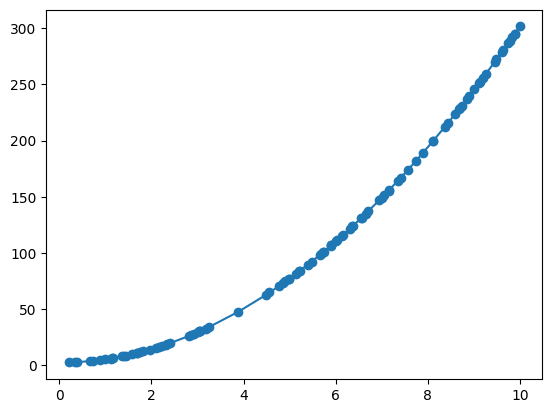

In [19]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt


x = np.sort(np.random.uniform(0,10,100)) 
print(x)
y = 3 * x**2 + 2 + np.random.uniform(0,0.5,100)

def func(x,a,b):
    return a*x**2 + b
    
popt, pcov = curve_fit(func,x,y)

print(popt, pcov)


plt.scatter(x,y)
plt.plot(x, func(x,*popt))